### Imports

In [11]:
import os
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import display, HTML

# Load training data
data_path = os.path.join(os.path.dirname(os.getcwd()), "jane-street-real-time-market-data-forecasting")
train = pl.scan_parquet(os.path.join(data_path, "train.parquet")).\
    select(
        pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
        pl.all(),
    )

### Basic info

In [2]:
# Get basic information about the dataset
train_schema = train.collect_schema()
train_feature_count = train.select('symbol_id').unique().collect().height

# Display collected information
print("Dataset Information:")
print("-" * 50)
print(f"Number of columns: {len(train_schema)}")
print(f"Number of unique symbol_ids: {train_feature_count}")
print("\nColumn Types:")
print("-" * 50)

# Group columns by data type
type_groups = {}
for col, dtype in train_schema.items():
    if dtype not in type_groups:
        type_groups[dtype] = []
    type_groups[dtype].append(col)

# Print columns grouped by data type
for dtype, cols in type_groups.items():
    print(f"\n{dtype}:")
    for col in cols:
        print(f"  - {col}")

print("\nNote: These statistics are based on the entire dataset and may take some time to compute.")

Dataset Information:
--------------------------------------------------
Number of columns: 94
Number of unique symbol_ids: 39

Column Types:
--------------------------------------------------

UInt64:
  - id

Int16:
  - date_id
  - time_id
  - feature_11

Int8:
  - symbol_id
  - feature_09
  - feature_10

Float32:
  - weight
  - feature_00
  - feature_01
  - feature_02
  - feature_03
  - feature_04
  - feature_05
  - feature_06
  - feature_07
  - feature_08
  - feature_12
  - feature_13
  - feature_14
  - feature_15
  - feature_16
  - feature_17
  - feature_18
  - feature_19
  - feature_20
  - feature_21
  - feature_22
  - feature_23
  - feature_24
  - feature_25
  - feature_26
  - feature_27
  - feature_28
  - feature_29
  - feature_30
  - feature_31
  - feature_32
  - feature_33
  - feature_34
  - feature_35
  - feature_36
  - feature_37
  - feature_38
  - feature_39
  - feature_40
  - feature_41
  - feature_42
  - feature_43
  - feature_44
  - feature_45
  - feature_46
  - feature_4

### Example and Stats

In [3]:
# Show the first few rows
train_first_rows = train.fetch(6795)

<ipython-input-3-06b4ef9e4b6c>:2: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  train_first_rows = train.fetch(6795)


In [3]:
train_data_full = train.collect()

In [4]:
train_statistics = train.select(pl.all().exclude(['symbol_id', 'date_id', 'time_id'])).describe()

In [5]:
# Function to create a title with description
def create_title(title, description):
    return HTML(f"""
    <h3>{title}</h3>
    <p><em>{description}</em></p>
    """)

display(create_title("The first x training rows", 
                     "--"))
display(train_first_rows)
# Display statistics
display(create_title("Statistical Summary of Training Data", 
                     "This table provides key statistical measures for each column in the dataset, including count, mean, standard deviation, and quartiles."))
display(train_statistics)

id,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,…,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
u64,i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64
0,0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,…,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,…,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
2,0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,…,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,…,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
4,0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,…,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6790,0,848,19,2.456331,null,nu

statistic,id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,…,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.7127338e7,4.7127338e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6827091e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.5918039e7,4.7127077e7,4.69255e7,4.7127112e7,4.7127112e7,4.7127338e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,4.6648881e7,4.6648881e7,…,4.608244e7,4.287324e7,4.7113533e7,4.608244e7,4.7127112e7,4.7127112e7,4.6648886e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6834511e7,4.6899772e7,4.6889675e7,4.6810175e7,4.6810175e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6643579e7,4.6643579e7,4.7068908e7,4.7068908e7,4.7107295e7,4.7107295e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7
"""null_count""",0.0,0.0,3.182052e6,3.182052e6,3.182052e6,3.182052e6,3.182052e6,0.0,0.0,0.0,300247.0,0.0,0.0,0.0,0.0,0.0,0.0,1.209299e6,261.0,201838.0,226.0,226.0,0.0,8.435985e6,0.0,0.0,0.0,0.0,8.435985e6,8.435985e6,0.0,0.0,0.0,8.435985e6,478457.0,478457.0,…,1.044898e6,4.254098e6,13805.0,1.044898e6,226.0,226.0,478452.0,0.0,0.0,0.0,292827.0,227566.0,237663.0,317163.0,317163.0,0.0,0.0,0.0,0.0,0.0,0.0,483759.0,483759.0,58430.0,58430.0,20043.0,20043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2.3564e7,2.009445,0.573833,0.010192,0.573102,0.572745,-0.000852,-0.03838,-0.005058,-0.013839,0.082467,32.762992,4.875799,170.69312,-0.038973,-0.026642,-0.041218,-0.251219,-0.20489,-0.242808,-0.008927,-0.031894,-0.209704,0.037687,0.067906,0.072203,0.572287,0.092576,-0.049244,-0.234434,-0.155543,-0.215313,-0.2576,0.036165,0.420549,-0.015209,…,-0.103892,0.074961,0.048527,0.086814,-0.028328,0.027874,-0.015198,-0.002545,-0.00665,0.012388,-0.179578,-0.145254,-0.166556,-0.043152,-0.050118,-0.042604,-0.023995,-0.040502,-0.032992,-0.021157,-0.036682,-0.016559,-0.023103,-0.002237,-0.008022,-0.00659,-0.012559,-0.001545,-0.000866,-0.000142,-0.01638,-0.012442,-0.016624,-0.002141,0.001476,-0.001114,5.409279
"""std""",1.3604e7,1.129388,1.327413,1.084941,1.32287,1.322849,1.037188,1.02012,1.065836,1.058633,0.973704,23.897102,3.036514,164.523054,0.93135,0.903511,0.927618,0.916496,0.891434,0.911261,1.035968,1.060218,0.905527,0.88762,0.979838,0.940164,1.449629,1.020206,1.059212,1.05812,1.038651,0.878222,0.927363,0.737381,1.264526,0.98832,…,1.004431,1.036738,0.914435,0.999288,0.998483,1.03619,0.951424,0.94698,0.952109,1.112283,0.79263,0.718381,0.724299,1.04563,1.065957,0.915921,0.882024,0.907692,0.942279,0.886376,0.930929,0.966191,0.958618,0.956047,0.948959,0.949269,0.943592,0.591211,0.587551,0.599179,0.819231,0.87284,0.734546,0.889852,0.916042,0.864412,2.610668
"""min""",0.0,0.149967,-5.794129,-5.741592,-5.72601,-5.60189,-5.79988,-25.350399,-58.604362,-39.085358,-15.566865,2.0,1.0,9.0,-1.913078,

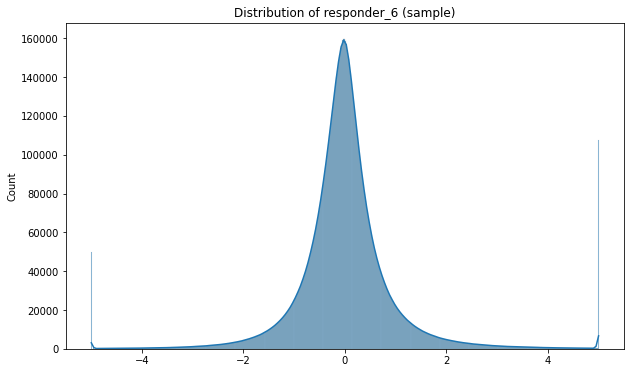

In [16]:
# Distribution of responder_6 (our target)
responder_6 = train.select('responder_6').collect()
plt.figure(figsize=(10, 6))
sns.histplot(responder_6['responder_6'], kde=True)
plt.title('Distribution of responder_6 (train)')
plt.show()

In [38]:
def get_target_correlations(lazy_df, feature_cols, target_col):
    correlations = []
    
    with tqdm(total=len(feature_cols), desc="Computing correlations") as pbar:
        for feature in feature_cols:
            corr = lazy_df.select(pl.corr(feature, target_col)).collect().item()
            correlations.append((feature, corr))
            pbar.update(1)
    
    return sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Get feature columns
feature_cols = [col for col in train.columns]
target_col = 'responder_6'

# Compute correlations with progress bar
print("Starting correlation computation with target variable...")
target_correlations = get_target_correlations(train, feature_cols, target_col)

<ipython-input-38-1c1026dd9323>:13: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  feature_cols = [col for col in train.columns] #if col.startswith('feature_')]


Starting correlation computation with target variable...


Computing correlations: 100%|██████████| 94/94 [00:55<00:00,  1.69it/s]


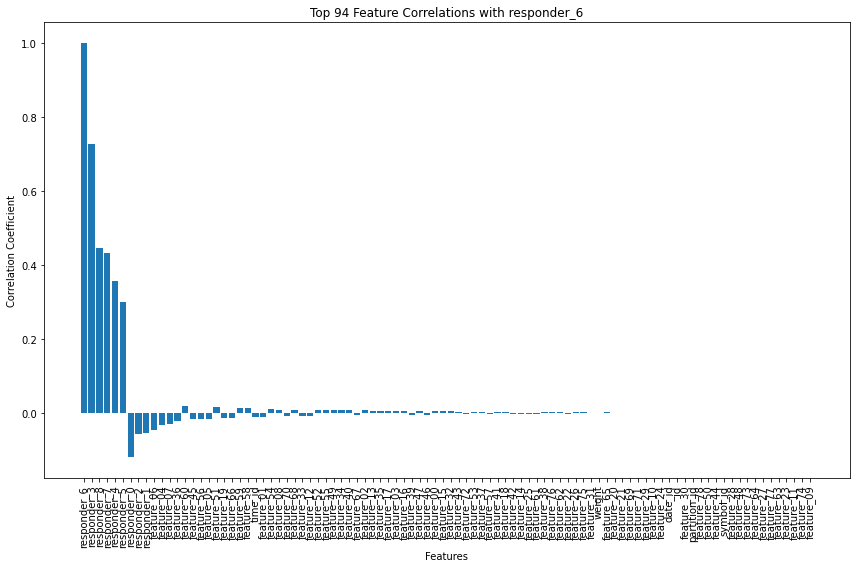

In [39]:

def plot_top_correlations(correlations, n=94):
    top_n = correlations[:n]
    features, corrs = zip(*top_n)
    
    plt.figure(figsize=(12, 8))
    plt.bar(features, corrs)
    plt.xticks(rotation=90)
    plt.title(f'Top {n} Feature Correlations with responder_6')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

plot_top_correlations(target_correlations)

In [19]:
def compute_lagged_correlations(df: pl.LazyFrame, feature_cols: list, target_col: str, max_lag: int = 5) -> pl.DataFrame:
    """
    Compute lagged correlations between features and target for a LazyFrame, excluding NaN correlations.
    
    Args:
    df (pl.LazyFrame): Input LazyFrame
    feature_cols (list): List of feature column names
    target_col (str): Name of the target column
    max_lag (int): Maximum lag to consider
    
    Returns:
    pl.DataFrame: Dataframe of average correlations, correlation counts, and NaN counts
    """
    correlations = []
    
    # Get unique date_ids
    unique_dates = df.select(pl.col('date_id').unique()).collect().to_series().sort()
    
    for date_id in tqdm(unique_dates, desc="Processing dates"):
        # Filter data for the current date
        day_data = df.filter(pl.col('date_id') == date_id)
        
        for feature in feature_cols:
            for lag in range(1, max_lag + 1):
                feature_lag_key = f"{feature}_lag{lag}"
                
                # Compute correlation between lagged feature and target
                corr = day_data.select([
                    pl.corr(pl.col(feature).shift(lag), pl.col(target_col)).alias('correlation')
                ]).collect().item()
                
                correlations.append((feature_lag_key, date_id, corr))
    
    # Convert correlations to DataFrame and compute statistics
    corr_df = pl.DataFrame(correlations, schema=['feature_lag', 'date_id', 'correlation'])
    
    result = (corr_df
        .lazy()
        .group_by('feature_lag')
        .agg([
            pl.col('correlation').mean().alias('avg_correlation'),
            pl.col('correlation').count().alias('total_count'),
            pl.col('correlation').filter(pl.col('correlation').is_not_nan()).count().alias('valid_count')
        ])
        .with_columns([
            (pl.col('valid_count') / pl.col('total_count') * 100).alias('valid_percentage'),
            (pl.col('total_count') - pl.col('valid_count')).alias('nan_count')
        ])
        .sort('avg_correlation', descending=True)
        .collect()
    )
    
    return result


In [21]:
# Usage
# Get feature columns without triggering the performance warning
feature_cols = [col for col in train.collect_schema().names() if col.startswith('id')]
target_col = 'responder_6'
max_lag = 1

print("Computing lagged correlations...")
lagged_correlations = compute_lagged_correlations(train, feature_cols, target_col, max_lag)

# Display the results
print(lagged_correlations)

Computing lagged correlations...


Processing dates:   0%|          | 6/1699 [00:12<57:33,  2.04s/it]


KeyboardInterrupt: 

In [7]:
# Plot top correlations
def plot_top_correlations(correlations, n=20):
    plt.figure(figsize=(15, 10))
    sns.barplot(x='avg_correlation', y='column_0', data=correlations.head(n))
    plt.title(f'Top {n} Lagged Feature Correlations with responder_6')
    plt.xlabel('Average Correlation Coefficient')
    plt.ylabel('Feature (with lag)')
    plt.tight_layout()
    plt.show()

In [8]:

plot_top_correlations(lagged_correlations)

NameError: name 'lagged_correlations' is not defined

In [ ]:
# Heatmap of top features across lags
def plot_correlation_heatmap(correlations, n_features=10):
    # Reshape data for heatmap
    top_features = correlations['column_0'].str.split('_lag').select(pl.col('field_0')).unique().head(n_features)
    heatmap_data = correlations.filter(pl.col('column_0').str.contains('^(' + '|'.join(top_features) + ')'))
    heatmap_data = heatmap_data.with_columns([
        pl.col('column_0').str.extract('(.+)_lag(\d+)', [0, 1])
    ]).pivot(
        values='avg_correlation',
        index='field_0',
        columns='field_1'
    ).sort('field_0')
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap of Top {n_features} Features Across Lags')
    plt.xlabel('Lag')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(lagged_correlations)

# Analysis of correlation stability
def plot_correlation_stability(df, feature_cols, target_col, n_features=5):
    correlations_over_time = []
    
    for date_id in tqdm(df['date_id'].unique().sort(), desc="Processing dates"):
        day_data = df.filter(pl.col('date_id') == date_id)
        
        day_correlations = day_data.select([
            pl.corr(feature, target_col).alias(feature)
            for feature in feature_cols
        ])
        
        correlations_over_time.append(day_correlations.with_column(pl.lit(date_id).alias('date_id')))
    
    correlations_df = pl.concat(correlations_over_time)
    
    # Plot stability for top features
    top_features = lagged_correlations.head(n_features)['column_0'].str.split('_lag').select(pl.col('field_0'))
    
    plt.figure(figsize=(15, 10))
    for feature in top_features:
        plt.plot(correlations_df['date_id'], correlations_df[feature], label=feature)
    
    plt.title(f'Correlation Stability of Top {n_features} Features Over Time')
    plt.xlabel('Date ID')
    plt.ylabel('Correlation Coefficient')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_correlation_stability(train_sample, feature_cols, target_col)

In [ ]:
# Time series plot of responder_6 for a single symbol_id
symbol_data = train.filter(pl.col('symbol_id') == train.select('symbol_id').first().collect().item()).collect()

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(symbol_data['date_id'], symbol_data['responder_6'])
plt.title(f'responder_6 over time for symbol_id {symbol_data["symbol_id"][0]}')
plt.xlabel('date_id')
plt.ylabel('responder_6')
plt.show()